# Ejercicio Nº1: Procesamiento Digital de Señales

## Problema 1: 

Establecer la frecuencia fundamental de una señal, considerando que la velocidad de muestreo puede generar aleasing. Reconstruir la señal filtrando los componentes para evitar el fenómeno antes mencionado.

En primera instancia, se importan las librerias necesarias para la interpretación de las funciones a utilizar.

In [1]:
import thinkdsp
import thinkplot
import numpy as np

from __future__ import print_function, division

%matplotlib inline

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from IPython.display import display

La variable "segment" que se declara a continuación, lee la señal cuadrada a partir del archivo de audio "cuadrada.wav". Luego, se reproduce la señal.

In [2]:
segment = thinkdsp.read_wave('cuadrada.wav')
segment.framerate = 11025
segment.make_audio()

A continuación, se obtiene el espectro de la señal cuadrada "segment". Y se grafíca en función de la Frecuencia y la Amplitud.

In [3]:
spectrum = segment.make_spectrum()

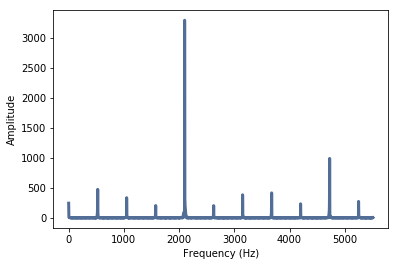

In [4]:
spectrum.plot()
thinkplot.config(xlabel='Frequency (Hz)', ylabel='Amplitude')

En el gráfico generado se visualiza la frecuencia fundamental en los 2100[Hz] y un aliasing generado a los 4750[Hz], que corresponde al reflejo del tercer armónico (6300[Hz]) al superar la amplitud de muestreo.
    *Recordemos que la señal fue muestreada a 11025 [Muestras/s]

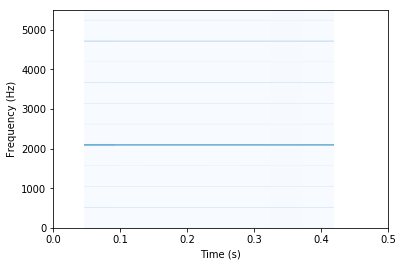

In [5]:
spectro = segment.make_spectrogram(seg_length=1024)
spectro.plot(high=5500)
thinkplot.config(xlabel='Time (s)', 
                 ylabel='Frequency (Hz)',
                 xlim=[segment.start, segment.end])

En el spectograma de arriba podemos ver la frecuencia fundamental de la señal que se mantiene lineal y constante en el tiempo a 2100 Hz, además de visualizar sus armónicos.

Utilizaremos la Transformada del Coseno para reconstruir la señal filtrando los componentes. Para ello se utiliza la clase propia de ThinkDSP DCT.

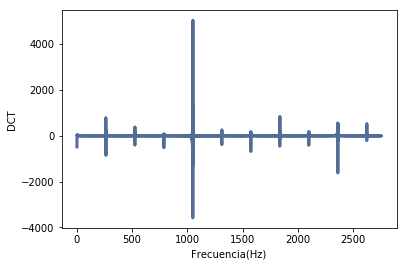

In [6]:
dct = segment.make_dct()
dct.plot()
thinkplot.config(xlabel='Frecuencia(Hz)', ylabel='DCT')

Finalmente creamos una nueva versión de la señal, con sus componentes filtrados.

In [7]:
wave2 = dct.make_wave()
wave2.make_audio()

## Problema 2:
A partir de análisis temporales y espectograma, describir el tipo de señal que es "desconocida.wav".

Para comenzar, se lee el archivo de audio y se reproduce. A partir de esto último, se puede identificar que hay tres formas dentro de la señal.

In [8]:
wave = thinkdsp.read_wave('desconocida.wav')
wave.make_audio()

Se realizara un espectrograma de la señal "desconocida.wav" para obtener las frecuencias en función del tiempo.

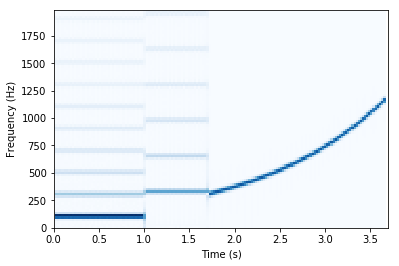

In [9]:
spectro_d = wave.make_spectrogram(seg_length=512)
spectro_d.plot(high=2000)
thinkplot.config(xlabel='Time (s)', 
                 ylabel='Frequency (Hz)',
                 xlim=[wave.start, wave.end])

A partir del análisis del espectrograma, se puede observar que la señal cambia abruptamente de frecuencia en dos puntos (1.0 y 1.7 seg aproximadamente). 

Para una mirada más detallada, separaremos la señal en tres segmentos utilizando los puntos antes mencionados como inicio de estos. Además, se escogió una duración de segmento de 0.04 segundos para poder apreciar claramente la forma de la onda.

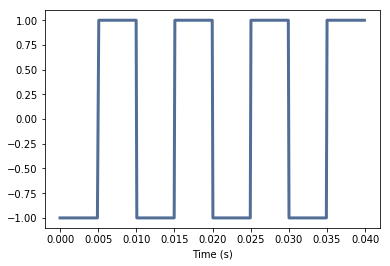

In [10]:
segment1 = wave.segment(start=wave.start, duration=0.04)
segment2 = wave.segment(start=1.0, duration=0.04)
segment3 = wave.segment(start=1.7, duration = 0.04)

segment1.plot()
thinkplot.config(xlabel='Time (s)')

Se aprecia claramente que, desde el inicio hasta el segundo 1, la señal tiene forma cuadrada de período 0.01 aprox. Y en el espectrograma que viene a continuación se ve que la frecuencia permanece constante durante el segmento.

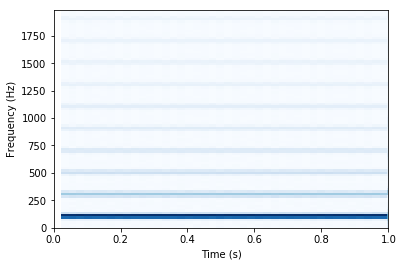

In [11]:
spectro_d = wave.make_spectrogram(seg_length=512)
spectro_d.plot(high=2000)
thinkplot.config(xlabel='Time (s)', 
                 ylabel='Frequency (Hz)',
                 xlim=[wave.start, 1.0])

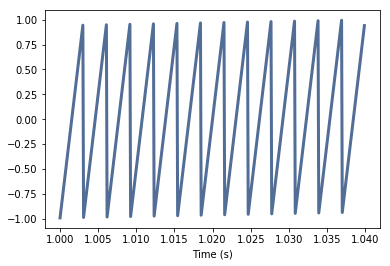

In [12]:
segment2.plot()
thinkplot.config(xlabel='Time (s)')

El segundo tramo de la señal tiene la forma de diente de sierra, cuyo período aproximado es de 0.003 segundos.

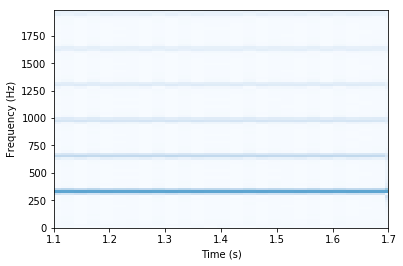

In [13]:
spectro_d = wave.make_spectrogram(seg_length=512)
spectro_d.plot(high=2000)
thinkplot.config(xlabel='Time (s)', 
                 ylabel='Frequency (Hz)',
                 xlim=[1.1, 1.7])

Para el segmento intermedio, la frecuencia también se muestra lineal y constante en el tiempo.

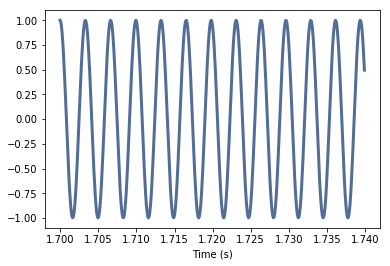

In [14]:
segment3.plot()
thinkplot.config(xlabel='Time (s)')

La última parte de la señal corresponde a una cosenoidal de período 0.0033 segundos; cuya frecuencia aumenta de manera exponencial en la duración del segmento.

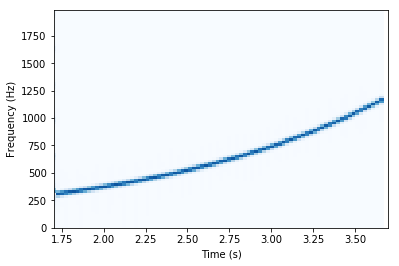

In [15]:
spectro_d = wave.make_spectrogram(seg_length=512)
spectro_d.plot(high=2000)
thinkplot.config(xlabel='Time (s)', 
                 ylabel='Frequency (Hz)',
                 xlim=[1.7, wave.end])

## Problema 3:
Encontrar la señal enmarcarada bajo el audio cubierto de ruido recibido desde el espacio exterior que se encuentra en el archivo 'incognita.wav'.

Primero crearemos las señales necesarias para hacer una comparación, aparte de leer la señal original.

In [16]:
wave = thinkdsp.read_wave('incognita.wav')
wave.make_audio()

In [17]:
#señal triangular de 1000Hz
signal1 = thinkdsp.TriangleSignal(freq=1000)
triangle1 = signal1.make_wave(duration=1.0)
triangle1.make_audio()

In [18]:
#señal triangular de 2000Hz
signal2 = thinkdsp.TriangleSignal(freq=2000)
triangle2 = signal2.make_wave(duration=1.0)
triangle2.make_audio()

In [19]:
#señal diente de sierra de 1500Hz
signal3 = thinkdsp.SawtoothSignal(freq=1500)
sawtooth = signal3.make_wave(duration=1.0)
sawtooth.make_audio()

In [20]:
#señal cosenoidal de 500Hz
signal4 = thinkdsp.CosSignal(500)
cosin = signal4.make_wave(duration=1)
cosin.make_audio()

Luego, obtenemos el espectro de la señal original.

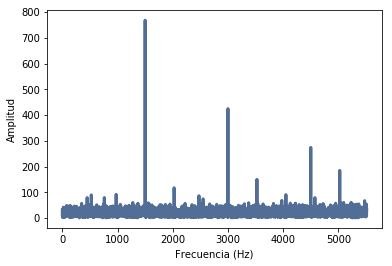

In [21]:
spectrum = wave.make_spectrum()
spectrum.plot()
thinkplot.config(xlabel='Frecuencia (Hz)', ylabel='Amplitud')

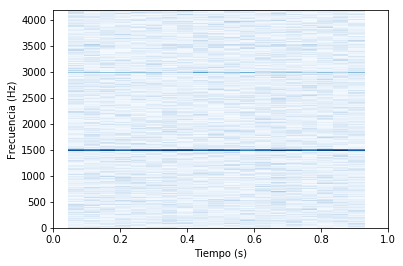

In [22]:
spectro = wave.make_spectrogram(seg_length=1024)
spectro.plot(high=4200)
thinkplot.config(xlabel='Tiempo (s)', 
                 ylabel='Frecuencia (Hz)',
                 xlim=[wave.start, wave.end])

Podemos ver claramente que la frecuencia fundamental se encuentra en los 1500Hz. Según la información dada podríamos asumir que es una señal diente de sierra a simple vista. Para definir a qué señal corresponde, realizaremos una correlación con cada una de las otras señales.

In [23]:
#Original vs Triangular 1000Hz
segment1 = wave.segment(start=0.0, duration=0.01)
segment2 = triangle1.segment(start=0.0, duration=0.01)
segment1.corr(segment2)

0.04155886695116086

In [24]:
#Original vs Triangular 2000Hz
segment1 = wave.segment(start=0.0, duration=0.01)
segment2 = triangle2.segment(start=0.0, duration=0.01)
segment1.corr(segment2)

0.07564529226455786

In [25]:
#Original vs Diente de Sierra 1500Hz
segment1 = wave.segment(start=0.0, duration=0.01)
segment2 = sawtooth.segment(start=0.0, duration=0.01)
segment1.corr(segment2)

0.5586545451409055

In [26]:
#Original vs Cosenoidal 500Hz
segment1 = wave.segment(start=0.0, duration=0.01)
segment2 = cosin.segment(start=0.0, duration=0.01)
segment1.corr(segment2)

0.07420715144815414

Luego de obtener la correlación entre las distintas señales, se concluye que la señal "incognita" es una señal del tipo Diente de Sierra.